In [ ]:
# Here we are working with MNIST Digit Classification with Neural Network
# This is an image recognization task.
# We have a dataset of about 70,000 handwritten numbers. We will feed this data to our Deep Learning Model and try to predict the numbers.

# The numbers are all in different shapes and styles.
# There will be lots of converting the data into simple numbers so that it's easy for our model to understand and process it faster.

# Now once we are done we will give new image and let our model predict the number that it in the new image.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from google.colab.patches import cv2_imshow
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

from keras.datasets import mnist

from tensorflow.math import confusion_matrix

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


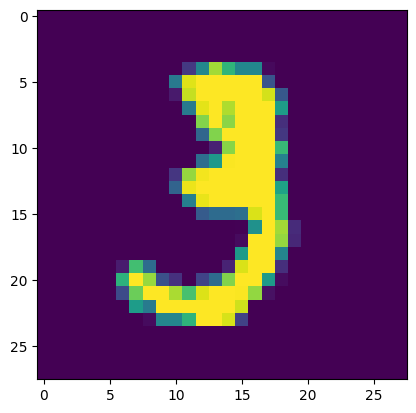

In [ ]:
plt.imshow(X_train[10])

In [ ]:
X_train[10].shape

(28, 28)

In [ ]:
print(Y_train[10])

3


In [ ]:
print(np.unique(X_train[10]))

[  0   1   6   7   8  11  18  19  24  25  28  31  34  36  40  41  42  50
  51  57  63  66  70  73  81  84  89  90  91  93 103 104 105 110 112 116
 117 118 128 137 138 139 140 141 146 164 165 166 171 177 180 197 206 207
 209 210 213 214 215 219 222 224 232 236 238 239 240 241 242 244 246 247
 250 253 254]


In [ ]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(np.unique(X_train))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

#Neural Network

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.3218 - accuracy: 0.9070 - val_loss: 0.1362 - val_accuracy: 0.9597
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9572 - val_loss: 0.1035 - val_accuracy: 0.9683
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1037 - accuracy: 0.9684 - val_loss: 0.1038 - val_accuracy: 0.9673
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0819 - accuracy: 0.9750 - val_loss: 0.0843 - val_accuracy: 0.9738
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0812 - val_accuracy: 0.9752
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0997 - val_accuracy: 0.9733
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0894 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9728


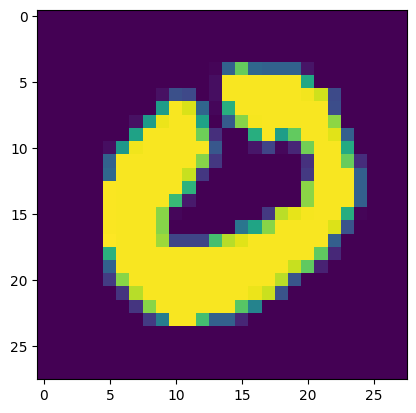

In [ ]:
plt.imshow(X_test[25])

In [ ]:
print(Y_test[25])

0


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
Y_pred.shape

(10000, 10)

In [ ]:
Y_pred[15]

array([1.4493246e-05, 3.1610304e-03, 2.5083113e-04, 9.6686304e-01,
       1.3280427e-06, 1.0000000e+00, 5.8815535e-03, 4.3711603e-05,
       7.5712740e-01, 5.2938364e-03], dtype=float32)

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred_labels[25])

0


Confusion Matrix

In [ ]:
con_matrix = confusion_matrix(Y_test, Y_pred_labels)
print(con_matrix)

tf.Tensor(
[[ 966    1    1    2    0    4    3    1    2    0]
 [   0 1124    4    0    0    0    2    1    4    0]
 [   1    2 1014    1    3    1    1    4    5    0]
 [   0    0    5  980    0    8    0    4    9    4]
 [   1    4    7    1  930    2    6    4    3   24]
 [   2    1    0    6    0  867    6    1    6    3]
 [   5    2    1    1    5    8  930    2    4    0]
 [   1    4   14    1    0    0    0  996    4    8]
 [   3    0    5    6    1    5    1    2  948    3]
 [   2    3    3   14    4    4    0    3    5  971]], shape=(10, 10), dtype=int32)


Text(0.5, 23.52222222222222, 'Predicted Values')

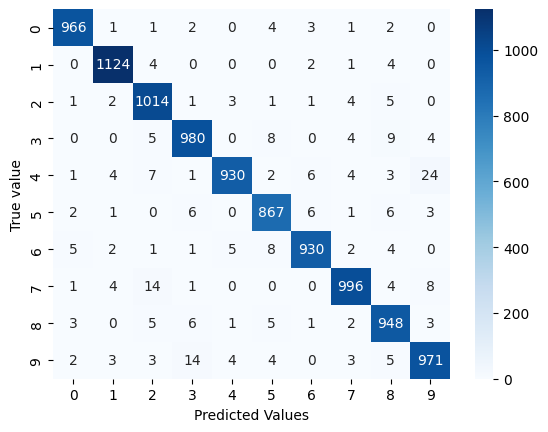

In [ ]:
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='d')
plt.ylabel('True value')
plt.xlabel('Predicted Values')

#Building Predictive System

In [ ]:
input_image_data = input("Give the path of the image")

Give the path of the image/content/MNIST_digit.png


In [ ]:
img = cv2.imread(input_image_data)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
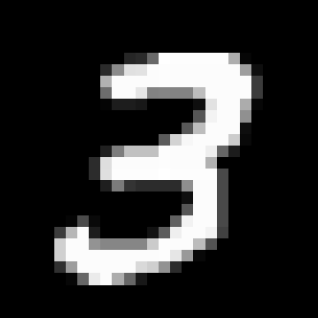

In [ ]:
img

In [ ]:
greyscale_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
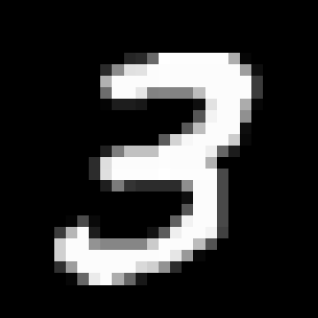

In [ ]:
greyscale_image

In [ ]:
greyscale_image = cv2.resize(greyscale_image, (28,28))

In [ ]:
greyscale_image

In [ ]:
greyscale_image = greyscale_image/255

In [ ]:
greyscale_image

In [ ]:
input_reshape = np.reshape(greyscale_image, [1,28,28])

In [ ]:
prediction = model.predict(input_reshape)

In [ ]:
print(prediction)

In [ ]:
prediction_label = [np.argmax(prediction)]

In [ ]:
print(prediction_label)